In [2]:
# Import base libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

### Data

Advance Retail Sales: Nonstore Retailers

Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

from 1992-01-01 to 2020-06-01

Source: https://fred.stlouisfed.org/series/RSNSRN

In [3]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving RSNSRN.csv to RSNSRN.csv


In [4]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded["RSNSRN.csv"]))

In [5]:
# Format the data
# The input to Prophet is always a dataframe with two columns: ds and y.
df.columns = ["ds","y"]
df["ds"] = pd.to_datetime(df["ds"])

In [6]:
# Create model and Fit all data
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# Forecasting
# Create "future" placeholder dataframe
future = m.make_future_dataframe(periods=24,freq = "MS")

In [8]:
df.tail()

,ds,y
337,2020-02-01,61687
338,2020-03-01,70076
339,2020-04-01,75452
340,2020-05-01,81397
341,2020-06-01,80203


In [9]:
future.tail()

,ds
361,2022-02-01
362,2022-03-01
363,2022-04-01
364,2022-05-01
365,2022-06-01


In [10]:
len(df)

342

In [11]:
len(future)

366

In [12]:
# Predict and fill in the Future
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,5609.756168,1609.295010,8462.270986,5609.756168,5609.756168,-641.352828,-641.352828,-641.352828,-641.352828,-641.352828,-641.352828,0.0,0.0,0.0,4968.403341
1,1992-02-01,5687.344682,391.048825,7424.528601,5687.344682,5687.344682,-1631.497623,-1631.497623,-1631.497623,-1631.497623,-1631.497623,-1631.497623,0.0,0.0,0.0,4055.847059
2,1992-03-01,5759.927485,2674.786757,9272.444268,5759.927485,5759.927485,284.195009,284.195009,284.195009,284.195009,284.195009,284.195009,0.0,0.0,0.0,6044.122495
3,1992-04-01,5837.515999,1403.938792,8127.309804,5837.515999,5837.515999,-1099.337660,-1099.337660,-1099.337660,-1099.337660,-1099.337660,-1099.337660,0.0,0.0,0.0,4738.178340
4,1992-05-01,5912.601658,1784.274931,8668.143381,5912.601658,5912.601658,-580.134678,-580.134678,-580.134678,-580.134678,-580.134678,-580.134678,0.0,0.0,0.0,5332.466980


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
361,2022-02-01,79913.721636,74776.676287,81423.531568,79558.720928,80193.302534,-1828.912362,-1828.912362,-1828.912362,-1828.912362,-1828.912362,-1828.912362,0.0,0.0,0.0,78084.809274
362,2022-03-01,80343.617088,77253.258058,84005.556455,79950.959971,80644.766528,390.567624,390.567624,390.567624,390.567624,390.567624,390.567624,0.0,0.0,0.0,80734.184713
363,2022-04-01,80819.572767,76241.741269,82974.150597,80401.835638,81141.159723,-1173.151889,-1173.151889,-1173.151889,-1173.151889,-1173.151889,-1173.151889,0.0,0.0,0.0,79646.420878
364,2022-05-01,81280.175037,76948.103573,84034.986820,80832.716642,81618.837149,-722.050137,-722.050137,-722.050137,-722.050137,-722.050137,-722.050137,0.0,0.0,0.0,80558.124900
365,2022-06-01,81756.130717,76739.254387,83269.739329,81273.435539,82116.555564,-1699.341350,-1699.341350,-1699.341350,-1699.341350,-1699.341350,-1699.341350,0.0,0.0,0.0,80056.789367


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [18]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
354,2021-07-01,74156.164199,70813.215128,77219.179788
355,2021-08-01,75710.131477,72620.842437,79087.397659
356,2021-09-01,75842.875096,72328.882771,79145.532322
357,2021-10-01,78033.856412,74503.583825,81319.039607
358,2021-11-01,81479.559032,77876.874718,84813.998771
359,2021-12-01,87919.202052,84571.805883,91340.925375
360,2022-01-01,79513.834862,76370.104256,82726.875868
361,2022-02-01,78084.809274,74776.676287,81423.531568
362,2022-03-01,80734.184713,77253.258058,84005.556455
363,2022-04-01,79646.420878,76241.741269,82974.150597


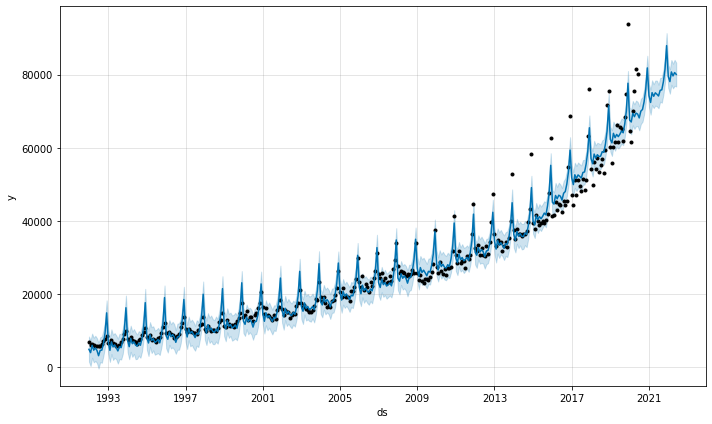

In [23]:
# Plotting Forecast
m.plot(forecast);